In [1]:
import pandas as pd

data = pd.read_csv('e-commerce_data.csv', encoding='ISO-8859-1')

In [2]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
data["Country"].nunique()

38

In [6]:
data = data.drop(columns=["InvoiceNo", "StockCode", "Description", "CustomerID"], axis=1)

In [7]:
print(data["InvoiceDate"].dtype)
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"], format="%m/%d/%Y %H:%M")

object


In [8]:
data["InvoiceDay"] = data["InvoiceDate"].dt.day
data["InvoiceMonth"] = data["InvoiceDate"].dt.month
data["InvoiceYear"] = data["InvoiceDate"].dt.year
data["InvoiceHour"] = data["InvoiceDate"].dt.hour
data["InvoiceMinute"] = data["InvoiceDate"].dt.minute

In [9]:
data = data.drop(columns=["InvoiceDate"], axis=1)
data.head()

,Quantity,UnitPrice,Country,InvoiceDay,InvoiceMonth,InvoiceYear,InvoiceHour,InvoiceMinute
0,6,2.55,United Kingdom,1,12,2010,8,26
1,6,3.39,United Kingdom,1,12,2010,8,26
2,8,2.75,United Kingdom,1,12,2010,8,26
3,6,3.39,United Kingdom,1,12,2010,8,26
4,6,3.39,United Kingdom,1,12,2010,8,26


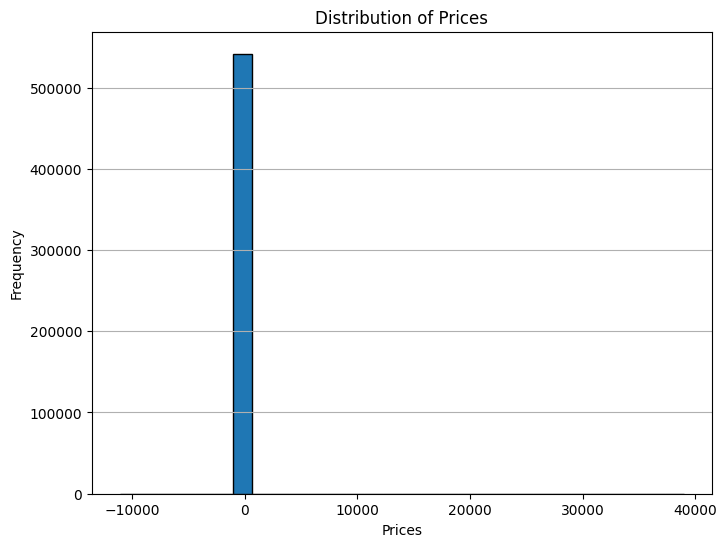

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(data['UnitPrice'], bins=30, edgecolor='black')
plt.title("Distribution of Prices")
plt.xlabel("Prices")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

In [11]:
# Let's examine the price data more closely
print("Price statistics:")
print(data['UnitPrice'].describe())
print(f"\nNumber of zero/negative prices: {(data['UnitPrice'] <= 0).sum()}")
print(f"Number of positive prices: {(data['UnitPrice'] > 0).sum()}")
print(f"\nMin price: {data['UnitPrice'].min()}")
print(f"Max price: {data['UnitPrice'].max()}")
print(f"\nValue counts for prices <= 0:")
print(data[data['UnitPrice'] <= 0]['UnitPrice'].value_counts().head())

Price statistics:
count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

Number of zero/negative prices: 2517
Number of positive prices: 539392

Min price: -11062.06
Max price: 38970.0

Value counts for prices <= 0:
UnitPrice
 0.00        2515
-11062.06       2
Name: count, dtype: int64


In [12]:
clean_data = data[data['UnitPrice'] > 0].copy()

Q1 = clean_data['UnitPrice'].quantile(0.25)
Q3 = clean_data['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Original data points: {len(data)}")
print(f"After removing zero/negative prices: {len(clean_data)}")
print(f"Price range for outlier removal: {lower_bound:.2f} to {upper_bound:.2f}")

clean_data = clean_data[(clean_data['UnitPrice'] >= lower_bound) & (clean_data['UnitPrice'] <= upper_bound)]

print(f"After removing outliers: {len(clean_data)}")
print(f"Cleaned price range: {clean_data['UnitPrice'].min():.2f} to {clean_data['UnitPrice'].max():.2f}")

Original data points: 541909
After removing zero/negative prices: 539392
Price range for outlier removal: -3.07 to 8.45
After removing outliers: 499767
Cleaned price range: 0.00 to 8.33


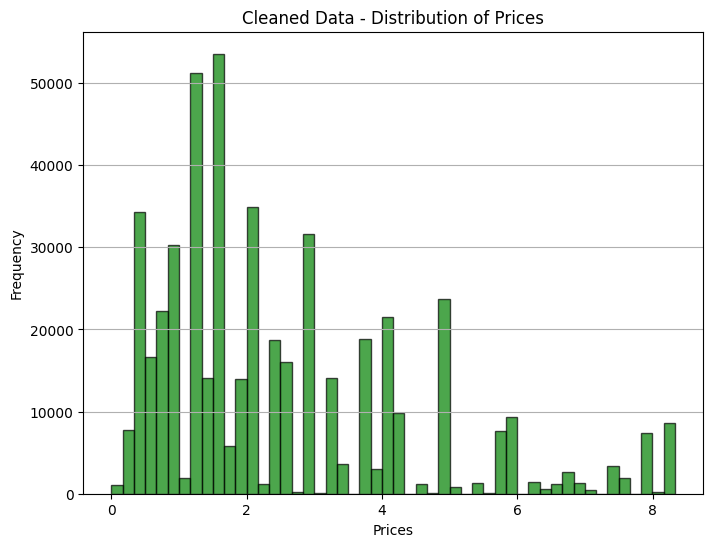

Cleaned data statistics:
count    499767.000000
mean          2.535198
std           1.914089
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max           8.330000
Name: UnitPrice, dtype: float64


In [13]:
plt.figure(figsize=(8, 6))
plt.hist(clean_data['UnitPrice'], bins=50, edgecolor='black', alpha=0.7, color='green')
plt.title("Cleaned Data - Distribution of Prices")
plt.xlabel("Prices")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

print(f"Cleaned data statistics:")
print(clean_data['UnitPrice'].describe())

In [14]:
# Normalize the cleaned data
clean_data['UnitPrice'] = (clean_data['UnitPrice'] - clean_data['UnitPrice'].min()) / (clean_data['UnitPrice'].max() - clean_data['UnitPrice'].min())

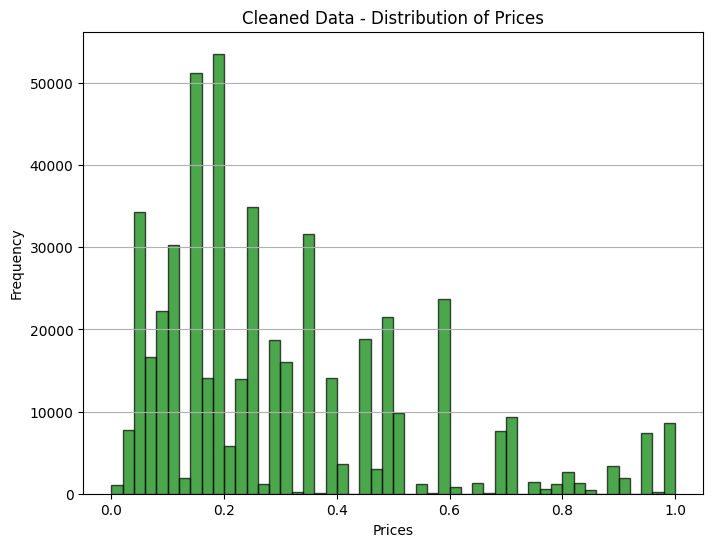

Cleaned data statistics:
count    499767.000000
mean          0.304262
std           0.229810
min           0.000000
25%           0.149958
50%           0.234002
75%           0.450114
max           1.000000
Name: UnitPrice, dtype: float64


In [15]:
plt.figure(figsize=(8, 6))
plt.hist(clean_data['UnitPrice'], bins=50, edgecolor='black', alpha=0.7, color='green')
plt.title("Cleaned Data - Distribution of Prices")
plt.xlabel("Prices")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

print(f"Cleaned data statistics:")
print(clean_data['UnitPrice'].describe())

In [16]:
import numpy as np

clean_data['UnitPrice'] = np.sqrt(clean_data['UnitPrice'])

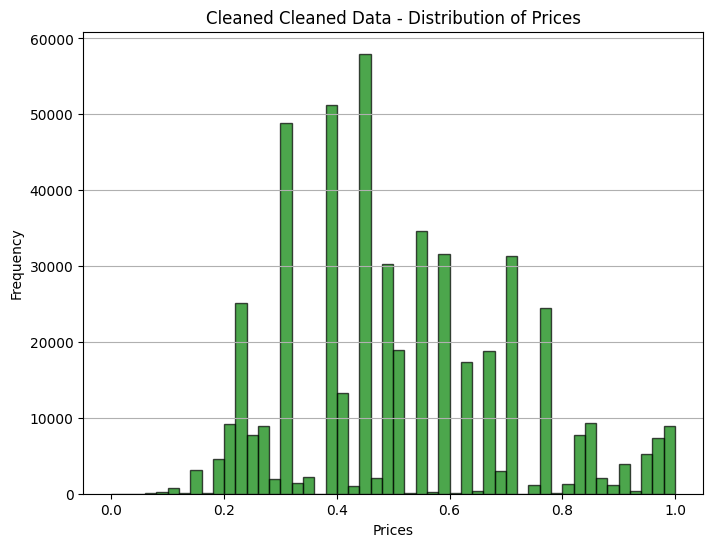

Cleaned data statistics:
count    499767.000000
mean          0.514189
std           0.199680
min           0.000000
25%           0.387244
50%           0.483737
75%           0.670905
max           1.000000
Name: UnitPrice, dtype: float64


In [17]:
plt.figure(figsize=(8, 6))
plt.hist(clean_data['UnitPrice'], bins=50, edgecolor='black', alpha=0.7, color='green')
plt.title("Cleaned Cleaned Data - Distribution of Prices")
plt.xlabel("Prices")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.show()

print(f"Cleaned data statistics:")
print(clean_data['UnitPrice'].describe())

In [18]:
import klib

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='UnitPrice', ylabel='Density'>

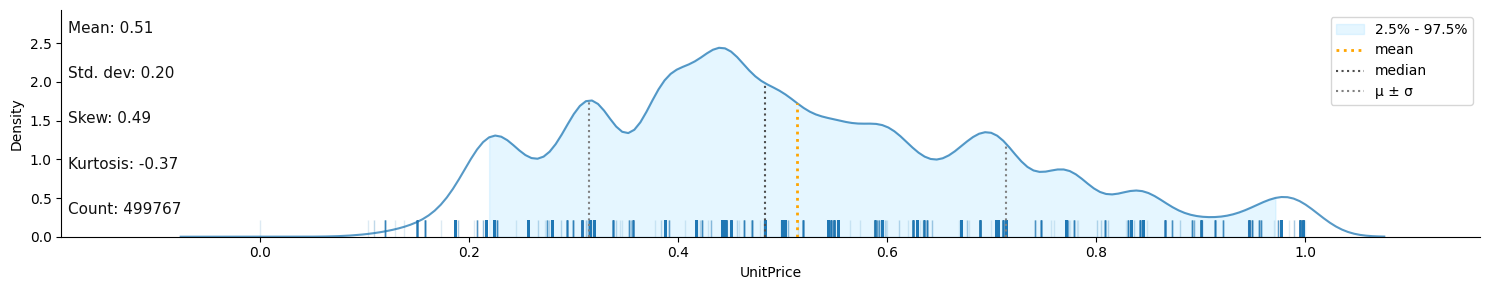

In [19]:
klib.dist_plot(clean_data["UnitPrice"])

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clean_data["UnitPrice"] = scaler.fit_transform(clean_data[["UnitPrice"]])

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='UnitPrice', ylabel='Density'>

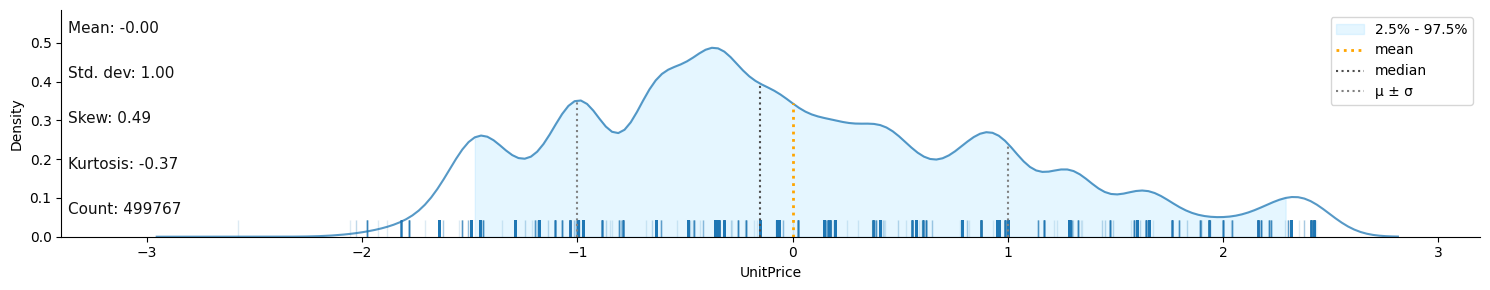

In [21]:
klib.dist_plot(clean_data["UnitPrice"])

In [22]:
klib.missingval_plot(clean_data)

No missing values found in the dataset.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

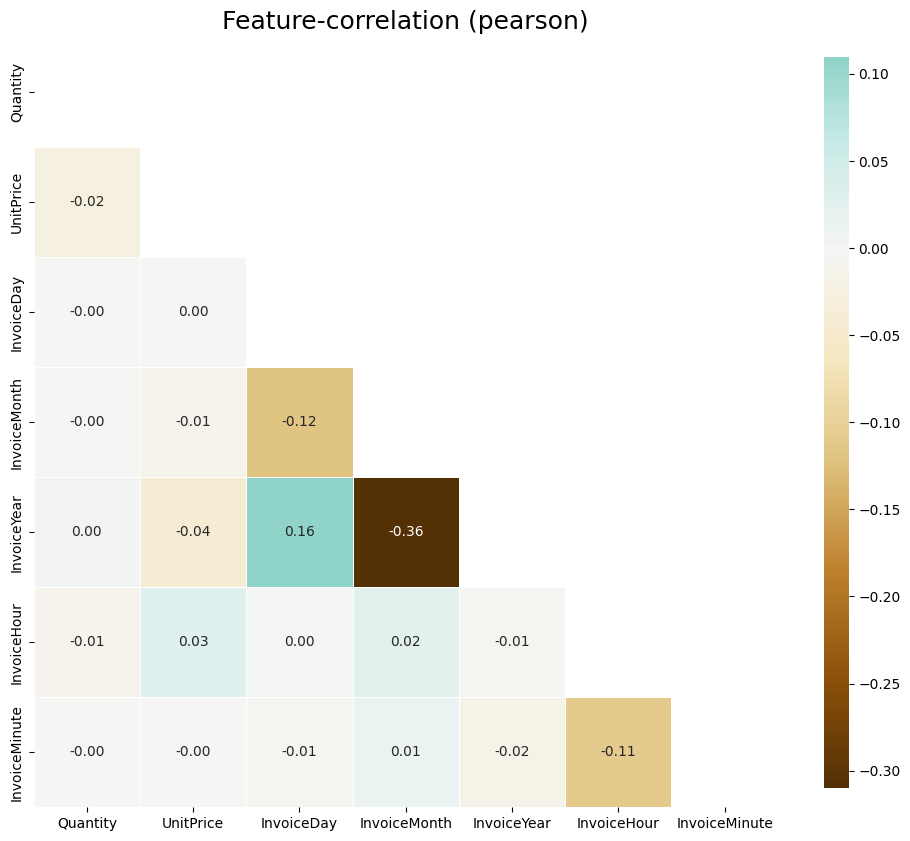

In [23]:
klib.corr_plot(clean_data)

<Axes: title={'center': 'Feature-correlation (spearman)'}>

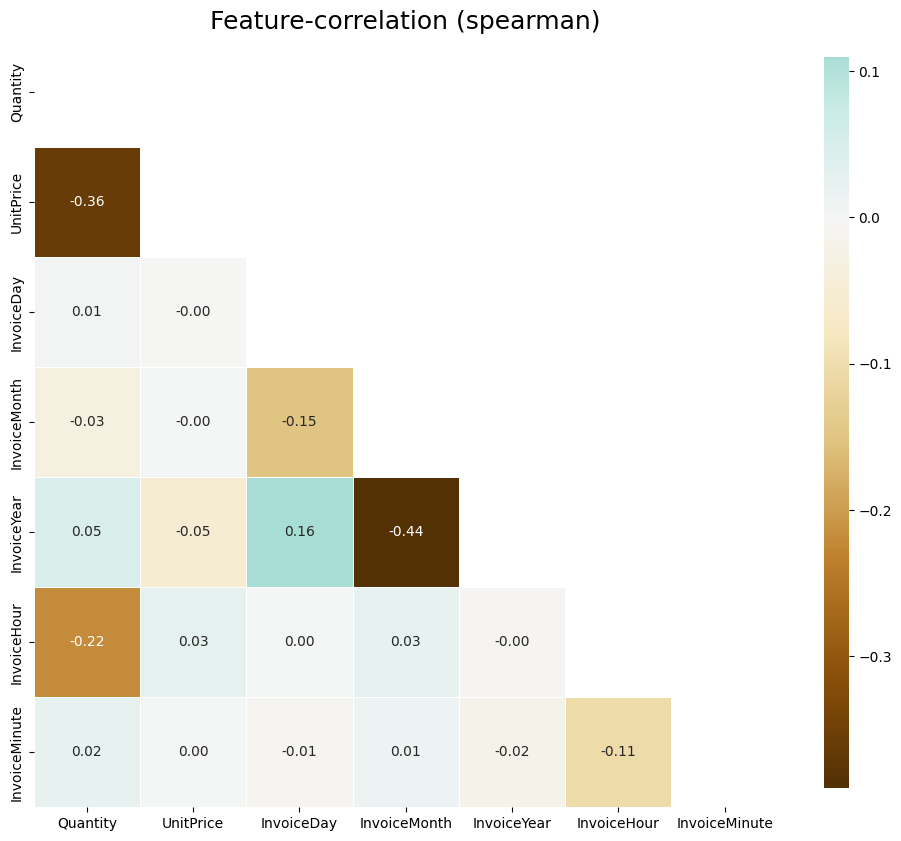

In [24]:
klib.corr_plot(clean_data, method="spearman")

<Axes: title={'center': 'Feature-correlation (kendall)'}>

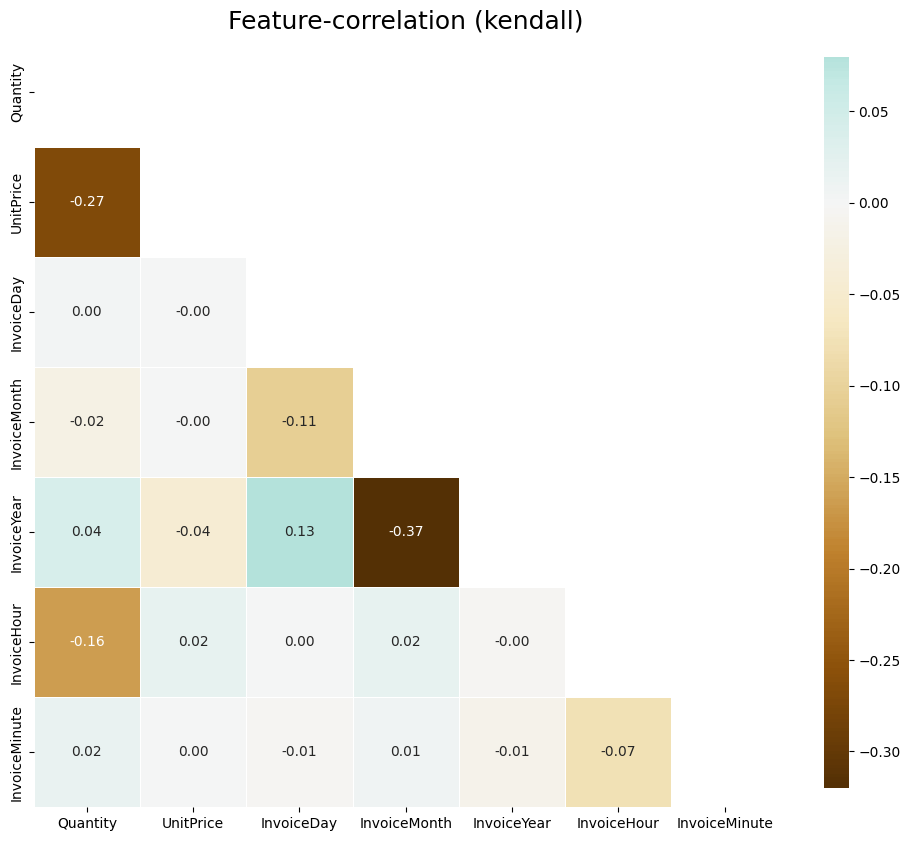

In [25]:
klib.corr_plot(clean_data, method="kendall")